In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("netflix_titles_2021.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<Axes: xlabel='release_year', ylabel='Count'>

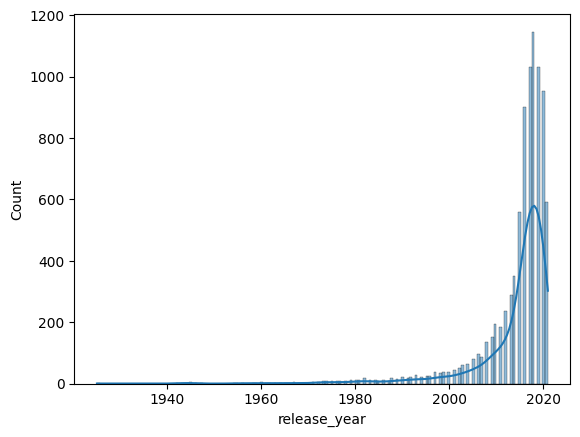

In [6]:
sns.histplot(df.release_year,kde=True)


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Let Handle Null values of Director
We basically replace all Null values based on the Most no. of movies makes by any  Director in Movies and TV Shows.


In [8]:
df.director.value_counts()

director
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Suhas Kadav                16
Marcus Raboy               16
Jay Karas                  14
                           ..
James Brown                 1
Ivona Juka                  1
Mu Chu                      1
Chandra Prakash Dwivedi     1
Majid Al Ansari             1
Name: count, Length: 4528, dtype: int64

In [9]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [10]:
grouped = df.groupby(['type', 'director']).size().reset_index(name='Count')
most_frequent_directors = grouped.loc[grouped.groupby('type')['Count'].idxmax()]
most_frequent_directors

,type,director,Count
3252,Movie,Rajiv Chilaka,19
4359,TV Show,Alastair Fothergill,3


In [11]:
df['director']=df.apply(
    lambda row : "Rajiv Chilaka" if pd.isnull(row["director"]) and row["type"]=="Movie"
    else  "Alastair Fothergill" if pd.isnull(row["director"]) and row["type"]=="TV Show"
    else row["director"],                                       
                                             
    axis=1
)

# Now see there are no NaN values in the `director` column
After replacing the missing values, we ensured that all `NaN` values in the `director` column were replaced with appropriate values based on the `type` column.


In [12]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

# Now let handle the `cast` column

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Alastair Fothergill,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Alastair Fothergill,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Alastair Fothergill,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
df.cast.value_counts()

cast
David Attenborough                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                        14
Samuel West                                                                                                                                                    10
Jeff Dunham                                                                                                                                                     7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                          6
                                                                                                                                                               ..
Ali Suliman, Saleh Bakr

In [15]:
cast_grouped = (
    df.groupby(['type', 'cast']).size()  # Count occurrences of each cast for each type
    .reset_index(name='Count')          # Reset index to create a DataFrame
    .sort_values(['type', 'Count'], ascending=[True, False])  # Sort by type and count
)

# Find the most frequent cast for each type
most_frequent_cast_by_type = cast_grouped.drop_duplicates(subset='type', keep='first')

# Display the result
print(most_frequent_cast_by_type)

         type                                               cast  Count
5188    Movie  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...     13
5950  TV Show                                 David Attenborough     14


In [16]:
def replace_nan_cast(df):
    # Dictionary mapping type to most frequent cast
    type_to_cast = {
        "Movie": "Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil ",
        "TV Show": "David Attenborough"
    }
    
    # Replace NaN values in 'cast' based on 'type'
    df['cast'] = df.apply(
        lambda row: type_to_cast[row['type']] if pd.isnull(row['cast']) else row['cast'],
        axis=1
    )
    
    return df

In [17]:
df = replace_nan_cast(df)

# Now See There Are No Null Values in the `cast` Column

We have successfully replaced all `NaN` values in the `cast` column. 

### Reason for Replacement:
The `cast` column contained missing values (`NaN`), which could cause issues during analysis or reporting. To address this:
- We analyzed the dataset and identified the most frequent `cast` for each `type` (`Movie` and `TV Show`).
- Based on the analysis:
  - For `Movies`, the most frequent cast was **Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...**.
  - For `TV Shows`, the most frequent cast was **David Attenborough**.
- We replaced the missing `cast` values with the most frequent cast for the corresponding `type`.

This ensures that all rows in the `cast` column now have meaningful values, enabling better analysis and avoiding potential errors caused by missing data.


In [18]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

# Now let handle the `country` column

In [19]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Alastair Fothergill,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Alastair Fothergill,David Attenborough,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Alastair Fothergill,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
df.country.value_counts()

country
United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64

In [21]:
country_grouped = (
    df.groupby(['type', 'country']).size()  # Count occurrences of each country for each type
    .reset_index(name='Count')             # Reset index to create a DataFrame
    .sort_values(['type', 'Count'], ascending=[True, False])  # Sort by type and count
)

# Find the country with the maximum count for each type
max_country_by_type = country_grouped.drop_duplicates(subset='type', keep='first')

# Display the result
print(max_country_by_type)

        type        country  Count
525    Movie  United States   2058
811  TV Show  United States    760


In [22]:
country_grouped_by_listed_in = (
    df.groupby(['listed_in', 'country']).size()  # Count occurrences of each country for each listed_in
    .reset_index(name='Count')                  # Reset index to create a DataFrame
    .sort_values(['listed_in', 'Count'], ascending=[True, False])  # Sort by listed_in and count
)

# Find the country with the maximum count for each listed_in
max_country_by_listed_in = country_grouped_by_listed_in.drop_duplicates(subset='listed_in', keep='first')

# Display the result
print(max_country_by_listed_in)

                                              listed_in        country  Count
23                                   Action & Adventure  United States     64
40    Action & Adventure, Anime Features, Children &...          Japan      2
43    Action & Adventure, Anime Features, Classic Mo...          Japan      1
44    Action & Adventure, Anime Features, Horror Movies          Japan      1
46    Action & Adventure, Anime Features, Internatio...          Japan     32
...                                                 ...            ...    ...
2620             TV Horror, TV Mysteries, Teen TV Shows  United States      1
2621                           TV Horror, Teen TV Shows  United States      2
2622                  TV Sci-Fi & Fantasy, TV Thrillers         Canada      1
2626                                           TV Shows  United States      4
2637                                          Thrillers  United States     43

[498 rows x 3 columns]


In [23]:
# Group by 'listed_in' and 'country', and count the occurrences
country_grouped_by_listed_in = (
    df.groupby(['listed_in', 'country']).size()  # Count occurrences of each country for each listed_in
    .reset_index(name='Count')                  # Reset index to create a DataFrame
    .sort_values(['listed_in', 'Count'], ascending=[True, False])  # Sort by listed_in and count
)

# Get the maximum count of all countries across all categories
max_count = country_grouped_by_listed_in['Count'].max()

# Get the corresponding country and listed_in
max_country = country_grouped_by_listed_in[country_grouped_by_listed_in['Count'] == max_count]

# Display the result
print(max_country)

          listed_in        country  Count
1163  Documentaries  United States    249


# Now anlysis the most efficetive way is to replace with `country` null values with most frequent country 

In [24]:
df['country'].fillna('United States', inplace=True)

C:\Users\lekhr\AppData\Local\Temp\ipykernel_16192\2631907390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('United States', inplace=True)


In [25]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [26]:
df.date_added.value_counts()

date_added
January 1, 2020       109
November 1, 2019       89
March 1, 2018          75
December 31, 2019      74
October 1, 2018        71
                     ... 
February 2, 2017        1
September 11, 2019      1
May 17, 2015            1
June 5, 2018            1
October 14, 2017        1
Name: count, Length: 1767, dtype: int64

In [27]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Alastair Fothergill,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Alastair Fothergill,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Alastair Fothergill,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
df['date_added'].fillna('January 1, 2020', inplace=True)

C:\Users\lekhr\AppData\Local\Temp\ipykernel_16192\3700860464.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna('January 1, 2020', inplace=True)


In [29]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [30]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Alastair Fothergill,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Alastair Fothergill,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Alastair Fothergill,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [31]:
df.rating.value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [32]:
df["rating"].fillna("TV-MA",inplace=True)

C:\Users\lekhr\AppData\Local\Temp\ipykernel_16192\1768259193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating"].fillna("TV-MA",inplace=True)


In [33]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [34]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Alastair Fothergill,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Alastair Fothergill,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Alastair Fothergill,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [35]:
df.duration.value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
             ... 
228 min         1
18 min          1
205 min         1
201 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [36]:
df = df[df['duration'].notnull()]

In [37]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Distribution of type (Movie vs. TV Show)

C:\Users\lekhr\AppData\Local\Temp\ipykernel_16192\1295159128.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors=plt.cm.get_cmap(cmap).colors[:len(percentages)],


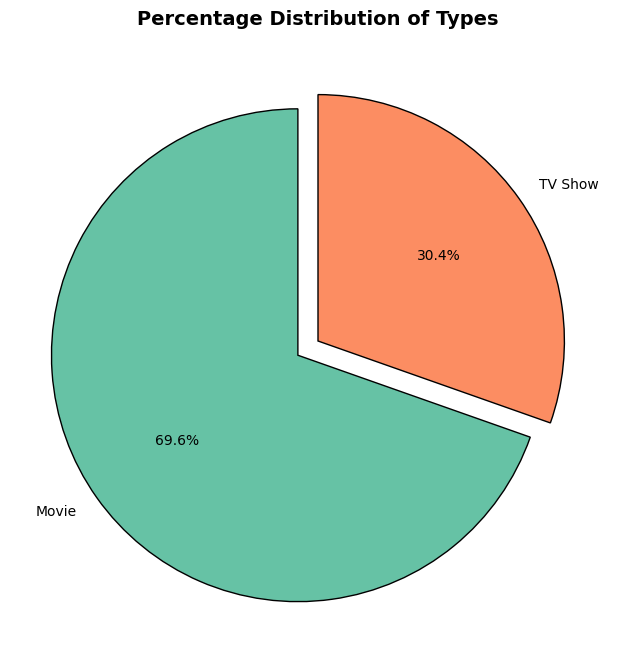

In [38]:
import matplotlib.pyplot as plt

def plot_pie_chart(data, column, title, figsize=(8, 8), cmap='Set2'):
    """
    Plots a pie chart for the given column in the dataset.

    Args:
        data (pd.DataFrame): The dataset containing the column.
        column (str): The column to calculate percentages for.
        title (str): Title of the chart.
        figsize (tuple): Figure size for the plot.
        cmap (str): Colormap for the pie chart.

    Returns:
        None
    """
    # Calculate the percentage of each unique value in the column
    percentages = data[column].value_counts(normalize=True) * 100

    # Dynamically set explode values for better emphasis
    explode = [0.1 if i == 0 else 0 for i in range(len(percentages))]  # Explode the largest slice

    # Plot the pie chart
    plt.figure(figsize=figsize)
    plt.pie(
        percentages,
        labels=percentages.index,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        colors=plt.cm.get_cmap(cmap).colors[:len(percentages)],
        wedgeprops={'edgecolor': 'black'}
    )

    # Add a title
    plt.title(title, fontsize=14, fontweight='bold')

    # Show the plot
    plt.show()

# Example usage
plot_pie_chart(df, column='type', title='Percentage Distribution of Types')


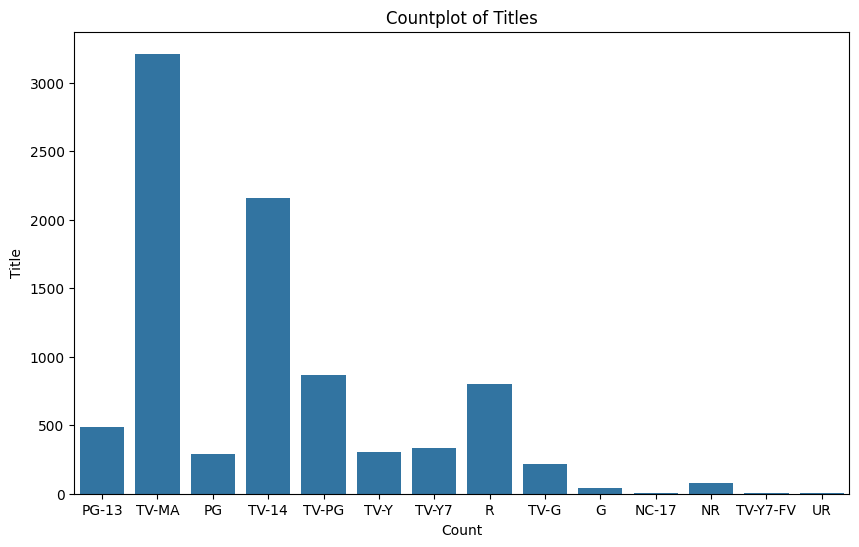

In [39]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='rating', data=df)
plt.title('Countplot of Titles')
plt.xlabel('Count')
plt.ylabel('Title')
plt.show()

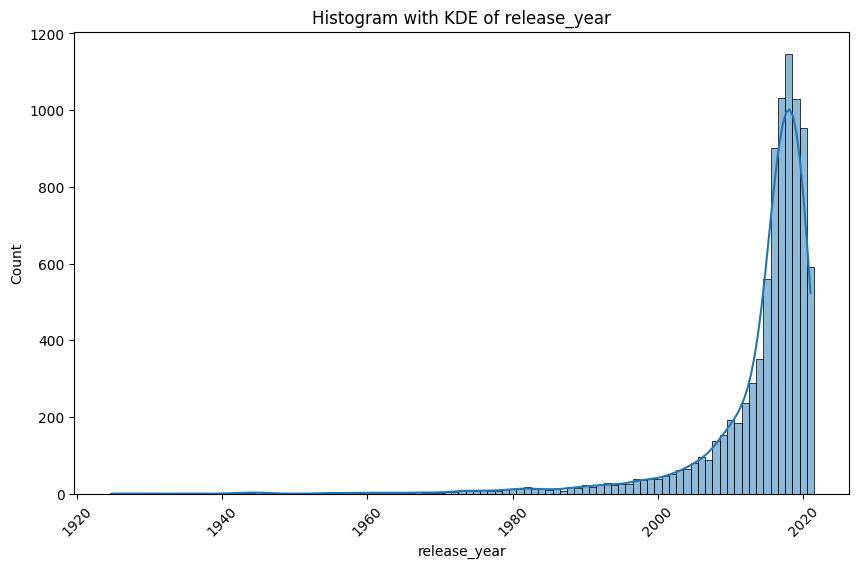

In [51]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(data=df, x='release_year', kde=True, discrete=True)
plt.title('Histogram with KDE of release_year')
plt.ylabel('Count')
plt.xlabel('release_year')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()


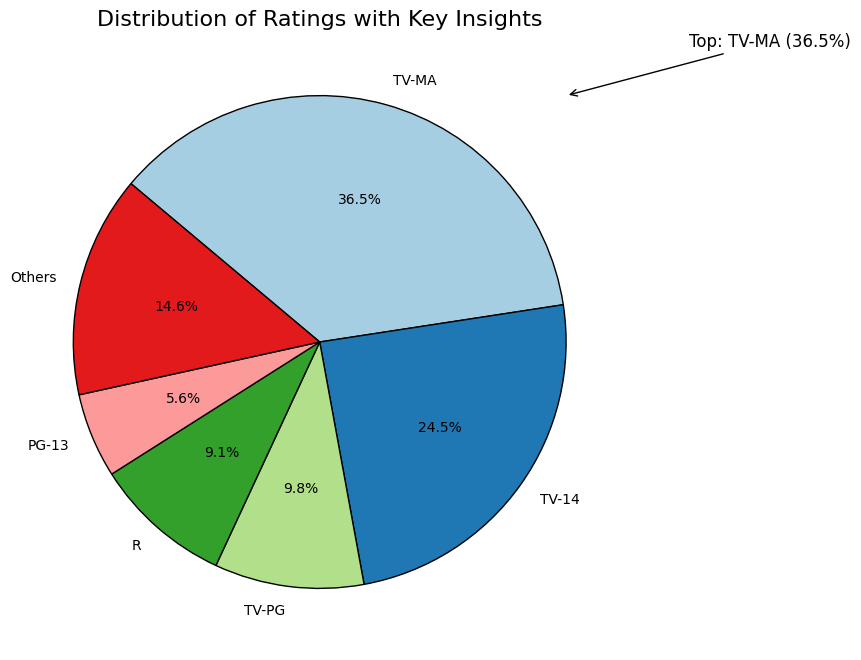

In [58]:
import matplotlib.pyplot as plt

# Calculate the frequency of each category in 'rating'
rating_counts = df['rating'].value_counts()

# Combine smaller categories into 'Others' for better visualization
threshold = 0.05 * rating_counts.sum()  # Define threshold as 5% of total
rating_counts['Others'] = rating_counts[rating_counts < threshold].sum()
rating_counts = rating_counts[rating_counts >= threshold]

# Create the pie chart
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired(range(len(rating_counts)))  # Business-friendly color palette
rating_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Ratings with Key Insights', fontsize=16)
plt.ylabel('')  # Remove y-axis label for better appearance

# Add annotation for the top category
top_rating = rating_counts.idxmax()
top_percentage = rating_counts.max() / rating_counts.sum() * 100
plt.annotate(
    f'Top: {top_rating} ({top_percentage:.1f}%)', 
    xy=(1, 1), xytext=(1.5, 1.2), 
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=12
)

plt.show()


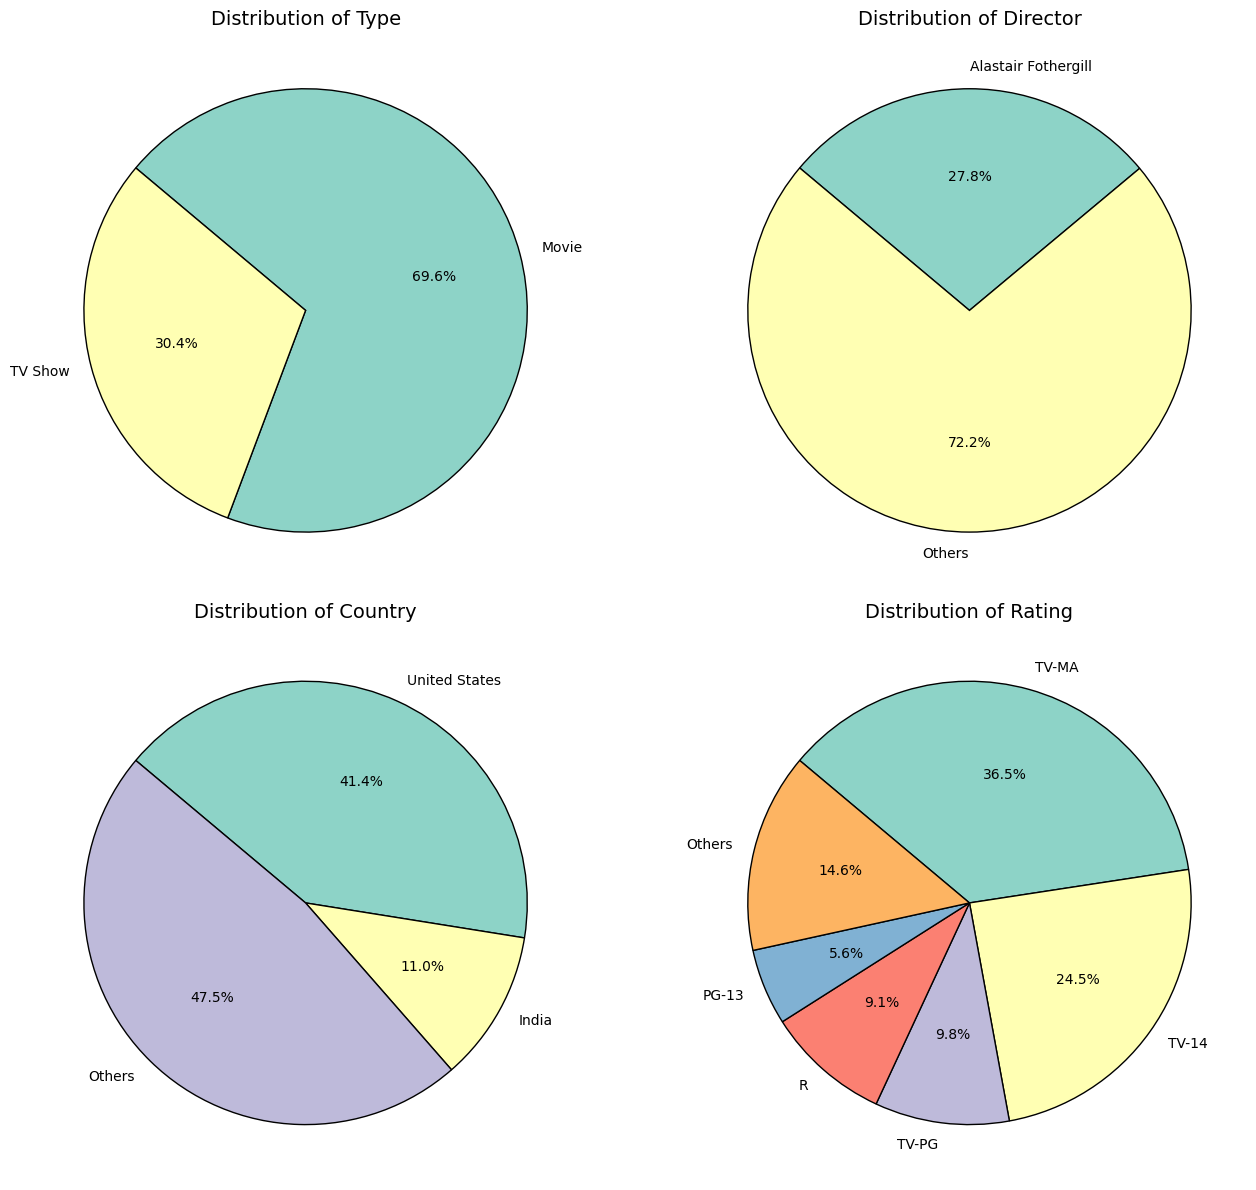

In [63]:
import matplotlib.pyplot as plt

# Define the columns to visualize
columns = ['type', 'director', 'country', 'rating']

# Set up the figure for a 2x2 grid of pie charts
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Adjust size as needed
axes = axes.flatten()  # Flatten the 2x2 grid into a 1D array for iteration

# Loop through the columns and create a pie chart for each
for i, column in enumerate(columns):
    # Calculate the frequency of each category
    counts = df[column].value_counts()

    # Combine smaller categories into 'Others' for better visualization
    threshold = 0.05 * counts.sum()  # Define threshold as 5% of total
    counts['Others'] = counts[counts < threshold].sum()
    counts = counts[counts >= threshold]

    # Create the pie chart
    counts.plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=140,
        counterclock=False,
        colors=plt.cm.Set3(range(len(counts))),
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(f'Distribution of {column.capitalize()}', fontsize=14)
    axes[i].set_ylabel('')  # Remove y-axis label for better appearance

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


# Top Countries Producing Content

C:\Users\lekhr\AppData\Local\Temp\ipykernel_16192\111067830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


<Axes: ylabel='country'>

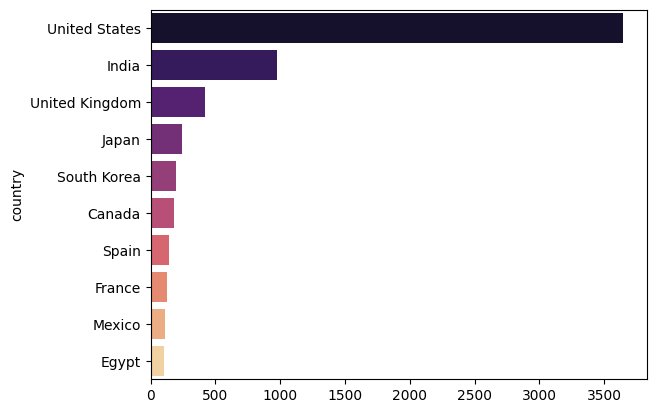

In [72]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


# Distribution of Content Duration

<Axes: xlabel='duration_numeric', ylabel='Count'>

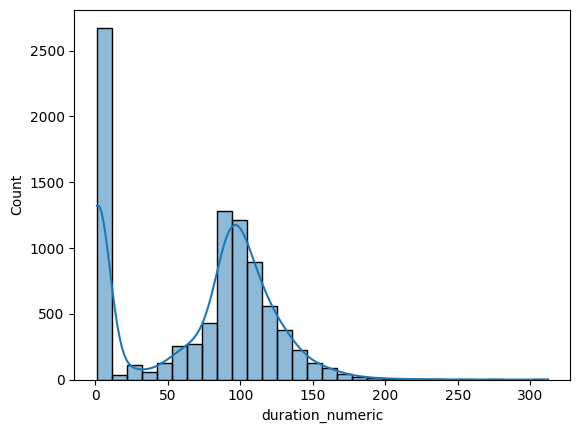

In [75]:
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)
sns.histplot(df['duration_numeric'], kde=True, bins=30)


 # Genres (listed_in)
Graph: Bar Chart (Horizontal)
        Insight: Identify the most popular genres.


C:\Users\lekhr\AppData\Local\Temp\ipykernel_16192\713792584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df.head(10), palette='Spectral')


<Axes: xlabel='Count', ylabel='Genre'>

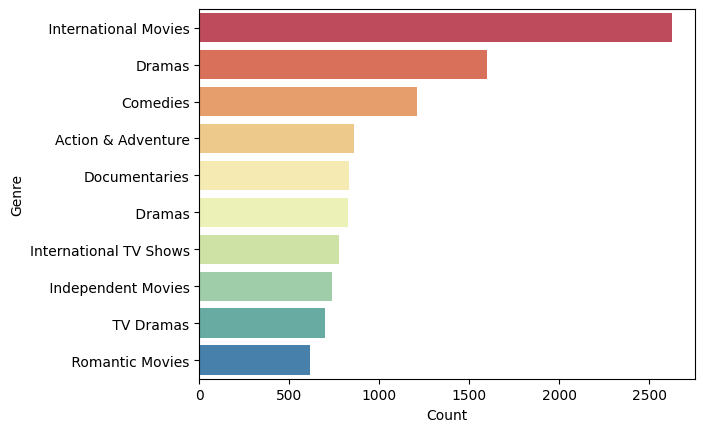

In [76]:
from collections import Counter
genre_counts = Counter(','.join(df['listed_in'].dropna()).split(','))
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
sns.barplot(x='Count', y='Genre', data=genre_df.head(10), palette='Spectral')


<Axes: title={'center': 'Content by Release Year'}, xlabel='release_year'>

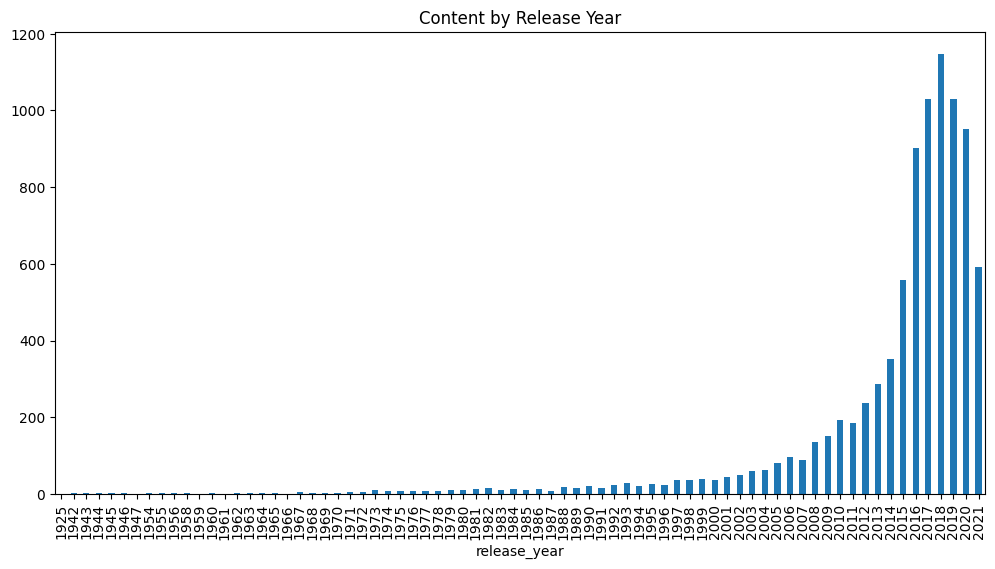

In [82]:
release_year_counts = df['release_year'].value_counts().sort_index()
release_year_counts.plot(kind='bar', figsize=(12, 6), title='Content by Release Year')


# Relationship Between type and rating
Graph: Stacked Bar Chart or Grouped Bar Chart
Insight: Compare the distribution of ratings for Movies vs. TV Shows.

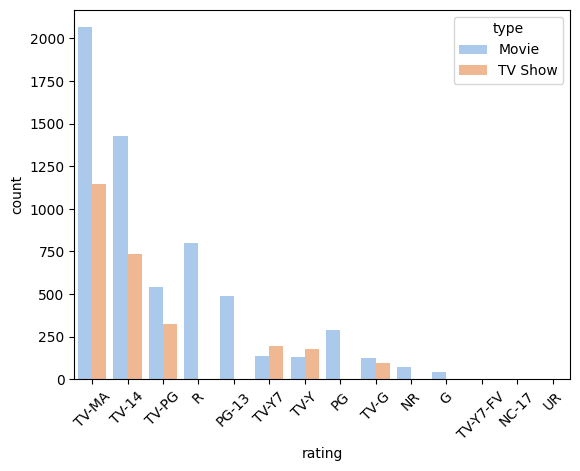

In [79]:
# Create the countplot
sns.countplot(x='rating', hue='type', data=df, palette='pastel', order=df['rating'].value_counts().index)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Word Cloud for description
Graph: Word Cloud
Insight: Extract the most common words used in the content descriptions.

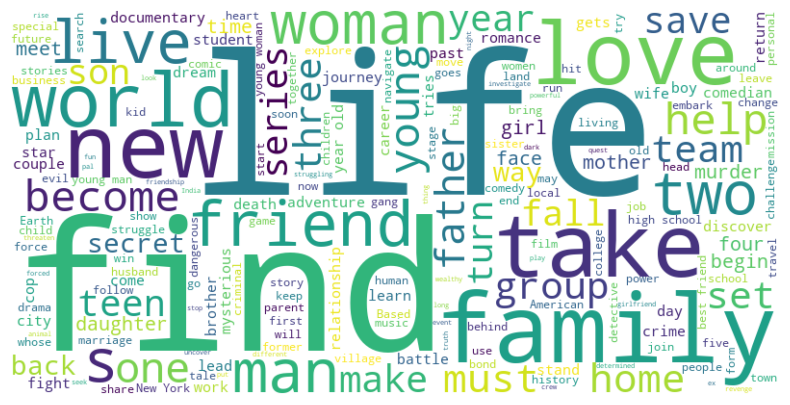

In [80]:
from wordcloud import WordCloud

text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [83]:
df.shape

(8804, 13)

In [84]:
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
duration_numeric    0
dtype: int64

In [85]:
df.to_csv('netflix_clean.csv')